## To open notebook with qiskit installed:
 - Go to anaconda powershell
 - "conda activate qiskit-runtime"
 - "jupyter notebook"

In [2]:
from qiskit import *

In [3]:
qr = QuantumRegister(2)

In [4]:
cr = ClassicalRegister(2)

In [5]:
%matplotlib inline

C:\Users\Maxwell\anaconda3\envs\qiskit-runtime\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


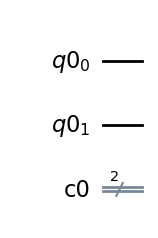

In [6]:
circuit = QuantumCircuit(qr, cr)
circuit.draw('mpl', style="iqp")

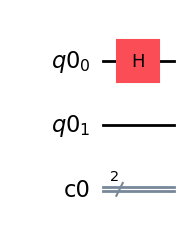

In [7]:
circuit.h(qr[0]) # hadimar gate for entanglement?
circuit.draw('mpl', style="iqp")

#### Hadamard Gate:
The h gate in quantum computing takes a qbit in a definite state and puts it in an equal superposition of |1> and |0>

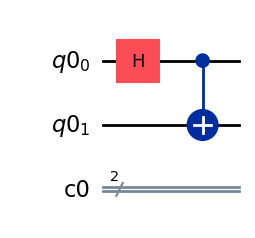

In [8]:
circuit.cx(qr[0], qr[1]) # controled not ## logical if (if this then that)
circuit.draw('mpl', style="iqp")

#### Controled not gate
assuming the qr[1] starts in state |0> the cx measures the top qr[0] which before was in a superposition.
 - if the top is measured to be |0> then the not gate (x) is not activated
 - if the top is measured to be |1> the the not is activated and the bottom |0> goes to |1>

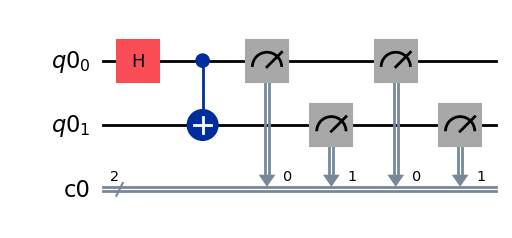

In [10]:
circuit.measure(qr, cr) # takes a measurement of the quantum bits and stores the values in the classical register
circuit.draw('mpl', style="iqp")

In [11]:
from qiskit_aer import Aer
sim = Aer.get_backend('qasm_simulator')

In [12]:
#results = execute(circuit, backend=sim).result() # outdated

In [13]:
transpiled_circuit = transpile(circuit, backend=sim)
results = sim.run(transpiled_circuit).result()

In [14]:
from qiskit.tools.visualization import plot_histogram

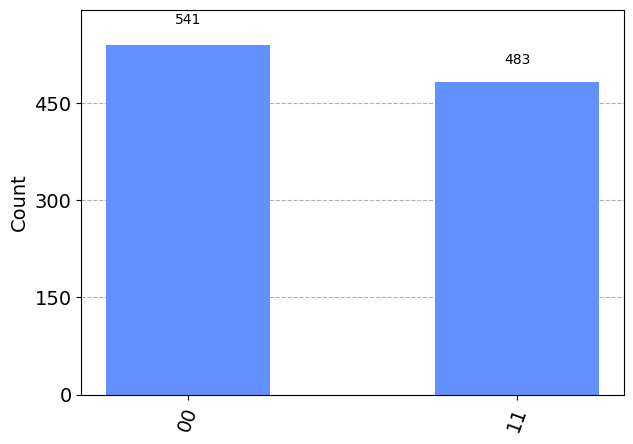

In [15]:
plot_histogram(results.get_counts(circuit))

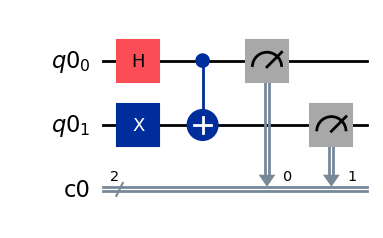

In [16]:
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.x(qr[1])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw('mpl', style="iqp")

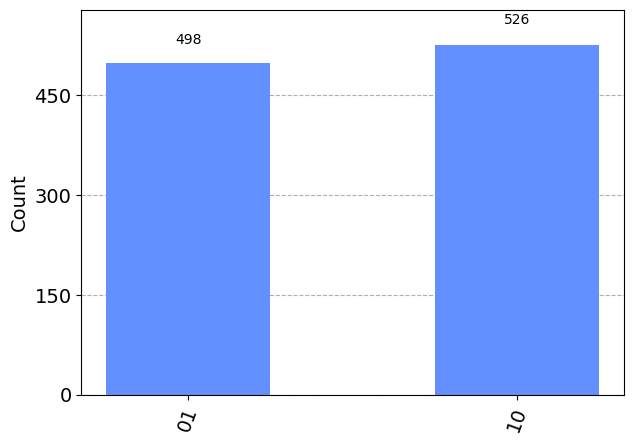

In [17]:
results = sim.run(transpile(circuit, backend=sim)).result()
plot_histogram(results.get_counts(circuit))

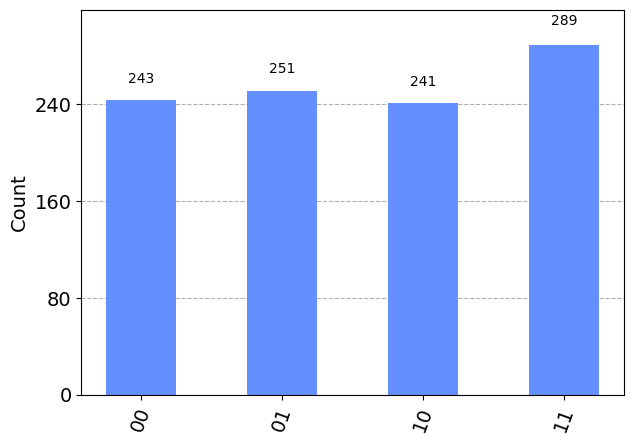

In [24]:
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.h(qr[1])
circuit.measure(qr, cr)
circuit.draw('mpl', style="iqp")
results = sim.run(transpile(circuit, backend=sim)).result()
plot_histogram(results.get_counts(circuit))

## Running on an actual quantum computer

In [39]:
IBMQ.load_account() # getting replaced

#import qiskit_ibm_provider
#qiskit_ibm_provider.IBMProvider().load_account()

ibmqfactory.load_account:WARNING:2024-02-02 14:47:23,707: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [40]:
provider = IBMQ.get_provider('ibm-q')
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>]

In [41]:
qcomp = provider.get_backend('ibm_brisbane')

In [47]:
trans_circuit = transpile(circuit, backend=qcomp)
job = qcomp.run(trans_circuit)

In [1]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

C:\Users\Maxwell\AppData\Local\Temp\ipykernel_22264\2249758446.py:1: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


NameError: name 'job' is not defined

In [ ]:
results = job.result()
plot_histogram(results.get_counts(circuit))